In [1]:
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from gradient_descent import Objective, plot_2d_objective, gradient_descent, gradient_descent_momentum

In [2]:
class ToyObjective(Objective):
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __call__(self, w):
        return self.a**(-2)*w[0]**2 + self.b**(-2)*w[1]**2
    
    def grad(self, w):
        return np.asarray([self.a**(-2)*2*w[0], self.b**(-2)*2*w[1]])
    

In [5]:
obj = ToyObjective(5., 1.)
obj(np.ones(2))

1.04

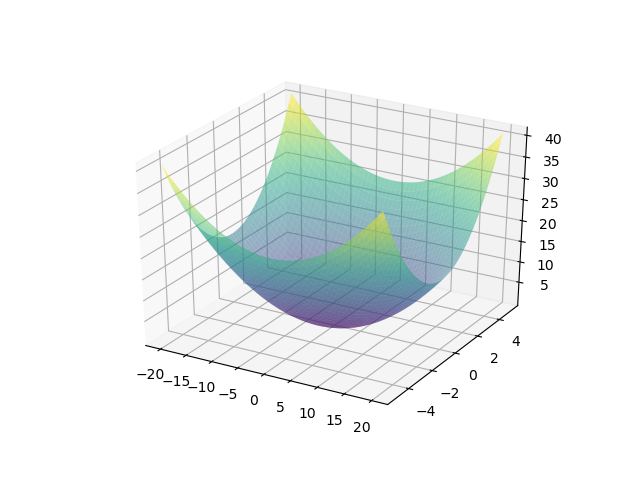

In [6]:
plot_2d_objective(plt.axes(projection='3d'), obj)
plt.show()

In [7]:
learning_rate = 0.1
tol = 1e-6
n_steps = 10000
w_init = np.asarray([10., 5.])
normalize = False

In [8]:
results = {}
results['GDM'] = gradient_descent_momentum(obj, w_init, learning_rate=learning_rate, tol=tol, n_steps=n_steps, normalize=normalize)
results['GD'] = gradient_descent(obj, w_init, learning_rate=learning_rate, tol=tol, n_steps=n_steps, normalize=normalize)

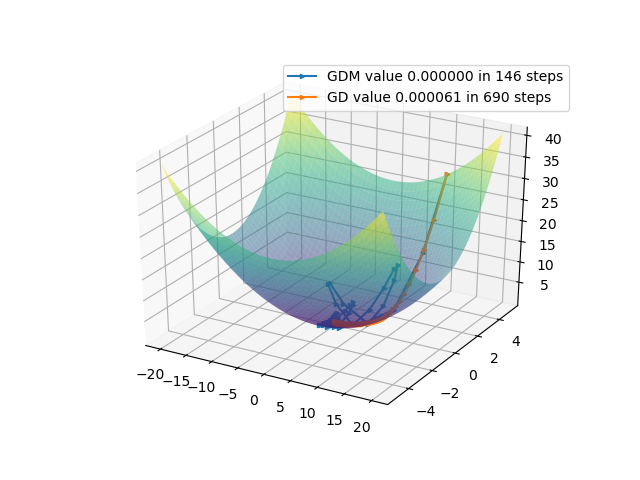

In [9]:
ax = plt.axes(projection='3d')
for key, val in results.items():
    w_hist = val[1]
    obj_hist = val[2]
    ax.plot(w_hist[:, 0], w_hist[:, 1], obj_hist,'->', label=key+" value %f in %d steps"%(obj(val[0]), len(w_hist)-1), alpha=1, markersize=3)
#plot_2d_objective(ax, obj, xrange=obj.xrange, yrange=obj.yrange)
plot_2d_objective(ax, obj)
plt.legend()
plt.show()